### Education Statistics Proje

### Veri Setleri
- **EdStatsData.csv**: Genel eğitim istatistiklerini içeren ana veri setidir.  
- **EdStatsEXCEL.xlsx**: Excel formatında eğitim verileri.  
- **EdStatsCountry-Series.csv**: Ülkelere göre eğitim serilerini içeren veri seti.  
- **EdStatsFootNote.csv**: Eğitimle ilgili dipnot bilgilerini içeren veri seti.  
- **EdStatsCountry.csv**: Ülkelere ait bilgileri içeren veri seti.  
- **EdStatsSeries.csv**: Eğitim istatistik serilerini içeren veri seti.  

### Kullanılan Kütüphaneler
- **pandas**: Veri analizi ve manipülasyonu için kullanılır.  
- **numpy**: Sayısal hesaplamalar için kullanılır.  
- **seaborn** ve **matplotlib**: Veri görselleştirme için kullanılır.  
- **plotly**: Etkileşimli grafikler oluşturmak için kullanılır.  
- **sklearn**: Makine öğrenimi için kullanılır.  

<a href="https://www.kaggle.com/datasets/theworldbank/education-statistics" target="_blank">Data dosyasını burada bulabilirsiniz</a>

In [1]:
#gerekli kutuphaneleri import ettik
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings 
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
import os 
os.chdir('C:\\Users\\akbab\\Desktop\\eğitim istatistikleri veri seti\\edstats-csv-zip-32-mb-\\newdata')

In [44]:
"""df = pd.read_csv('EdStatsData.csv')
df1 = pd.read_excel("EdStatsEXCEL.xlsx")
df2 = pd.read_csv("EdStatsCountry-Series.csv")
df3 = pd.read_csv("EdStatsFootNote.csv")
df4 = pd.read_csv("EdStatsCountry.csv")
df5 = pd.read_csv("EdStatsSeries.csv")""";

In [52]:
"""# Rastgele 1000 satır seç
df1 = df1.dropna(axis=1, how='all')
df_sample = df1.sample(n=1000, random_state=1)
df_sample.to_csv('EdStatsEXCEL5.csv', index=False)
#
df2 = df2.dropna(axis=1, how='all')
df_sample = df2.sample(n=1000, random_state=1)
df_sample.to_csv('EdStatsCountry-Series5.csv', index=False)
#
df3 = df3.dropna(axis=1, how='all')
df_sample = df3.sample(n=1000, random_state=1)
df_sample.to_csv('EdStatsFootNote5.csv', index=False)
#
df4 = df4.dropna(axis=1, how='all')
df_sample = df4.sample(n=1000, random_state=1)
df_sample.to_csv('EdStatsCountry.csv', index=False)
#
df5 = df5.dropna(axis=1, how='all')
df_sample = df5.sample(n=1000, random_state=1)
df_sample.to_csv('EdStatsSeries5.csv', index=False)""";

In [6]:
df1 = pd.read_excel("EdStatsEXCEL5.xlsx")
df2 = pd.read_csv("EdStatsCountry-Series5.csv")
df3 = pd.read_csv("EdStatsFootNote5.csv")
df4 = pd.read_csv("EdStatsCountry.csv")
df5 = pd.read_csv("EdStatsSeries5.csv")

In [80]:
print(df.info())
print(df1.info())
print(df2.info())
print(df3.info())
print(df4.info())
print(df5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 69 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [81]:
#ilk 5
print(df.head())
print(df1.head())
print(df2.head())
print(df3.head())
print(df4.head())
print(df5.head())

  Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2055  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN

In [82]:
#son 5
print(df.tail())
print(df1.tail())
print(df2.tail())
print(df3.tail())
print(df4.tail())
print(df5.tail())

       Country Name Country Code  \
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 years, b...   
886927  Youth literacy rate, population 15-24 years, f...   
886928  Youth literacy rate, population 15-24 years, g...   
886929  Youth literacy rate, population 15-24 years, m...   

              Indicator Code  1970  1971  1972  1973  1974  1975  ...  2055  \
886925      UIS.LP.AG15T24.M   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
886926     SE.ADT.1524.LT.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
886927  SE.ADT.1524.LT.FE.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
886928  SE.ADT.1524.LT.FM.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
886929  SE.ADT.1524.L

In [83]:
#satır sutun 
print(df.shape)
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(886930, 69)
(1000, 69)
(613, 4)
(1000, 5)
(241, 32)
(1000, 5)


In [84]:
#istatiksel 
print(df.describe())
print(df1.describe())
print(df2.describe())
print(df3.describe())
print(df4.describe())
print(df5.describe())

               1970          1971          1972          1973          1974  \
count  7.228800e+04  3.553700e+04  3.561900e+04  3.554500e+04  3.573000e+04   
mean   1.974772e+09  4.253638e+09  4.592365e+09  5.105006e+09  5.401493e+09   
std    1.211687e+11  1.804814e+11  1.914083e+11  2.059170e+11  2.112150e+11   
min   -1.435564e+00 -1.594625e+00 -3.056522e+00 -4.032582e+00 -4.213563e+00   
25%    8.900000e-01  8.853210e+00  9.240920e+00  9.595200e+00  9.861595e+00   
50%    6.317724e+00  6.316240e+01  6.655139e+01  6.969595e+01  7.087760e+01   
75%    6.251250e+01  5.655200e+04  5.863650e+04  6.202900e+04  6.383675e+04   
max    1.903929e+13  1.986457e+13  2.100916e+13  2.238367e+13  2.282991e+13   

               1975          1976          1977          1978          1979  \
count  8.730600e+04  3.748300e+04  3.757400e+04  3.757600e+04  3.680900e+04   
mean   2.314288e+09  5.731808e+09  6.124437e+09  6.671489e+09  7.436724e+09   
std    1.375059e+11  2.215546e+11  2.325489e+11  2.

In [85]:
#null değerlerin toplamı
print(df.isnull().sum())
print(df1.isnull().sum())
print(df2.isnull().sum())
print(df3.isnull().sum())
print(df4.isnull().sum())
print(df5.isnull().sum())

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2080              835494
2085              835494
2090              835494
2095              835494
2100              835494
Length: 69, dtype: int64
Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1970              914
                 ... 
2080              940
2085              940
2090              940
2095              940
2100              940
Length: 69, dtype: int64
CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64
CountryCode       0
SeriesCode        0
Year              0
DESCRIPTION       0
Unnamed: 4     1000
dtype: int64
Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-a

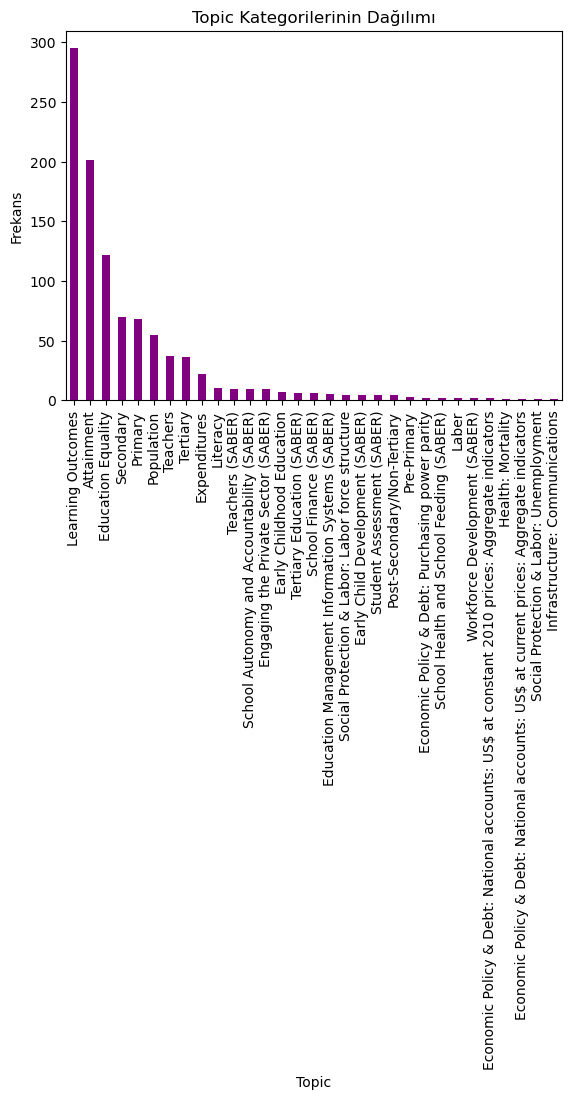

In [86]:
# Topic sütunundaki kategorilerin frekanslarını görselleştirme
df5['Topic'].value_counts().plot(kind='bar', color='purple')
plt.title('Topic Kategorilerinin Dağılımı')
plt.xlabel('Topic')
plt.ylabel('Frekans')
plt.xticks(rotation=90)
plt.show()

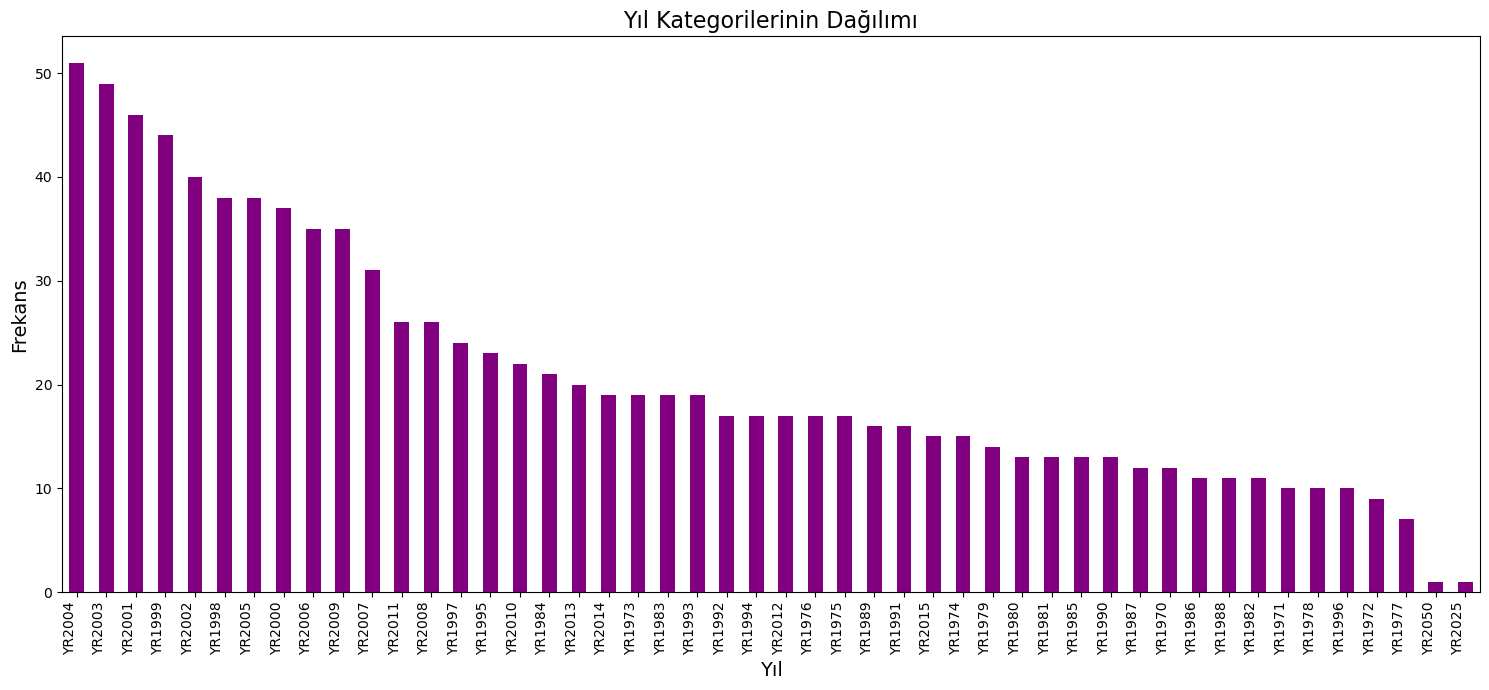

In [96]:
# 'Year' sütunundaki yılların frekans dağılımını görselleştirme
plt.figure(figsize=(15, 7))  
df3['Year'].value_counts().plot(kind='bar', color='purple')
plt.title('Yıl Kategorilerinin Dağılımı', fontsize=16)  
plt.xlabel('Yıl', fontsize=14)  
plt.ylabel('Frekans', fontsize=14) 
plt.xticks(rotation=90, ha='right', fontsize=10)  
plt.tight_layout()  
plt.show()

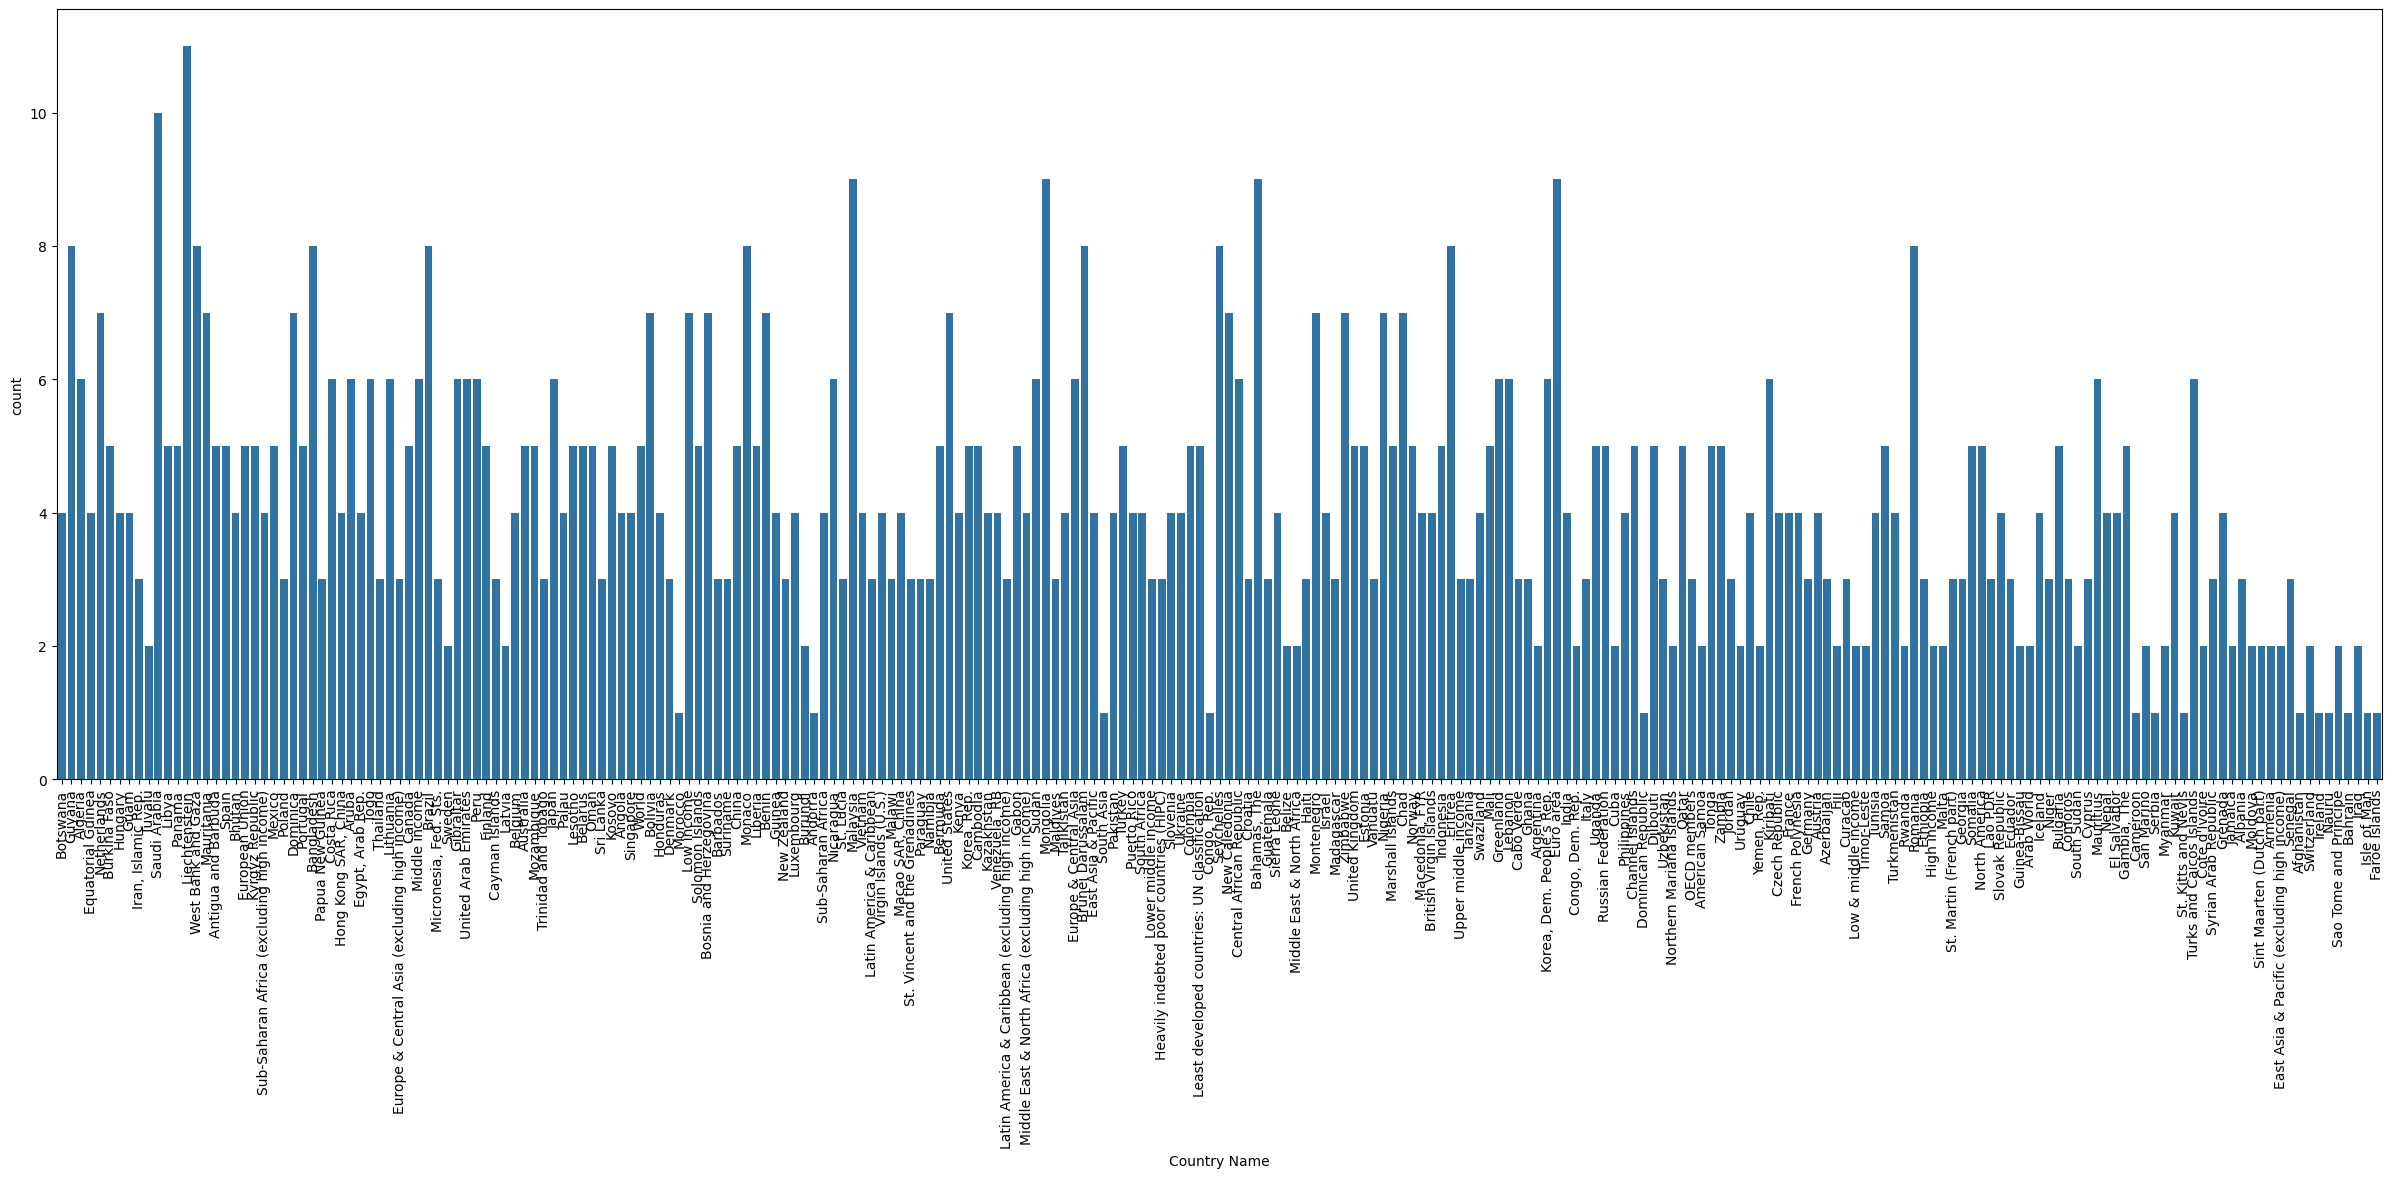

In [7]:
#Country Name sütunundaki ülkelerin frekans dağılımını görselleştirme
plt.figure(figsize=(30,10))
sns.countplot(x=df1['Country Name'])
plt.xticks(rotation=90);

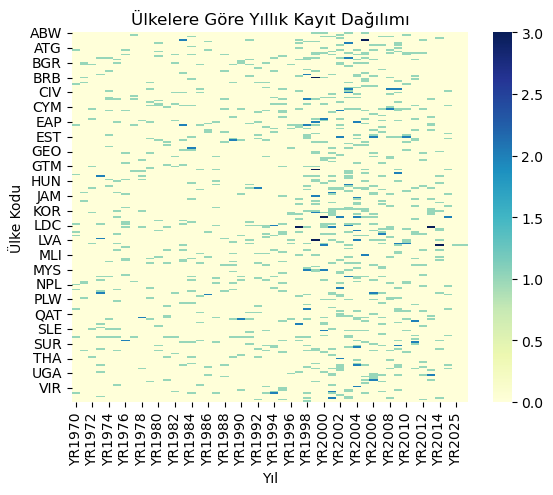

In [95]:
# ülke ve yıl bazında bir ısı haritası (heatmap)
heatmap_data = df3.pivot_table(index='CountryCode', columns='Year', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Ülkelere Göre Yıllık Kayıt Dağılımı')
plt.xlabel('Yıl')
plt.ylabel('Ülke Kodu')
plt.show()

<Axes: >

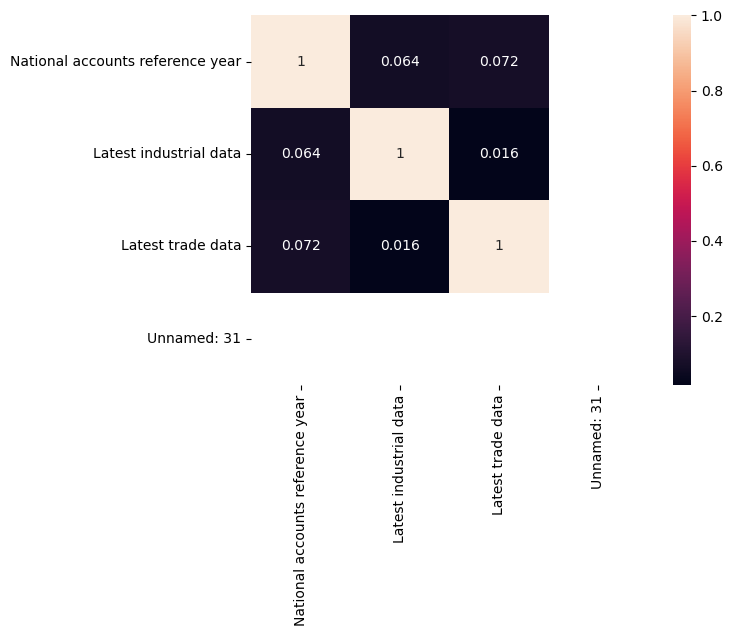

In [99]:
 #sayısal değişkenler arasındaki korelasyon matrisini görselleştirme
sns.heatmap(df4.corr(numeric_only=True),annot=True)

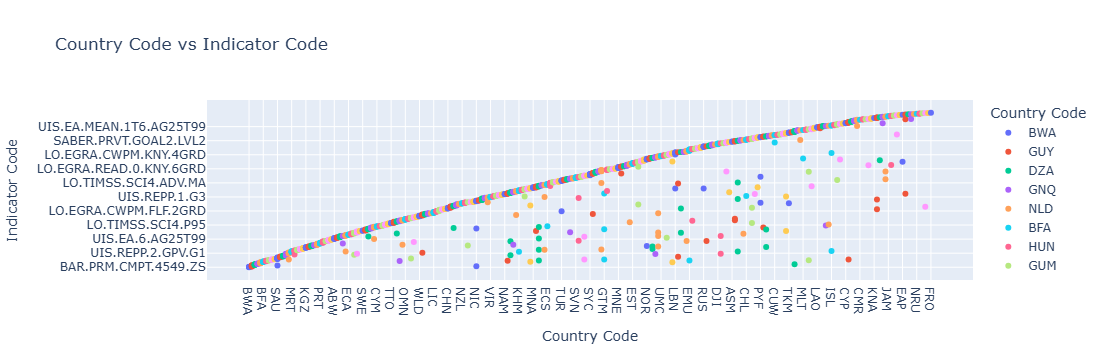

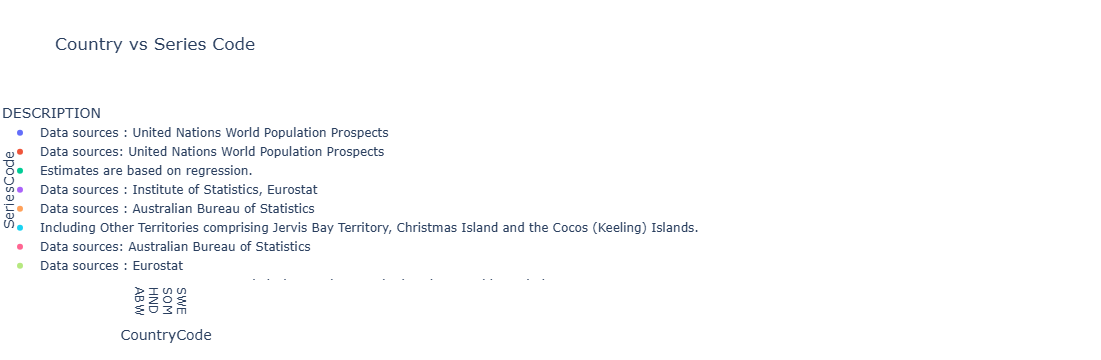

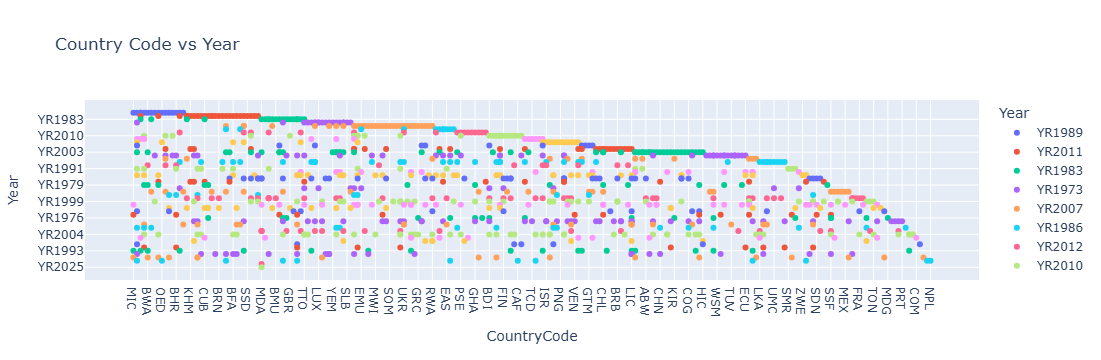

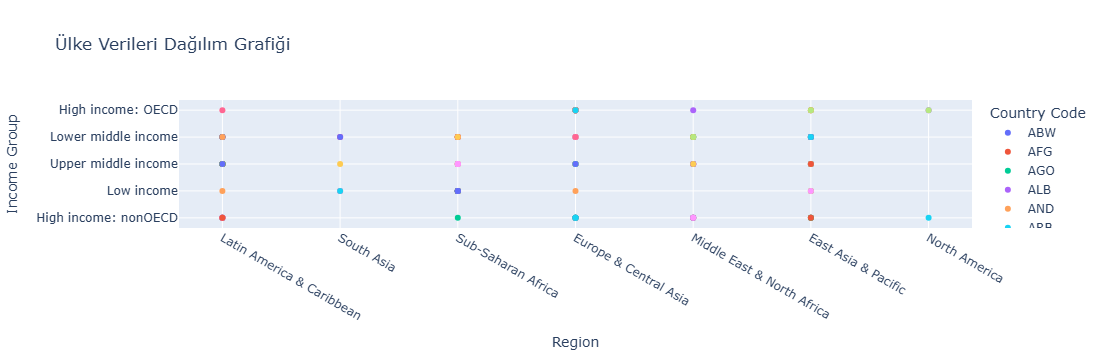

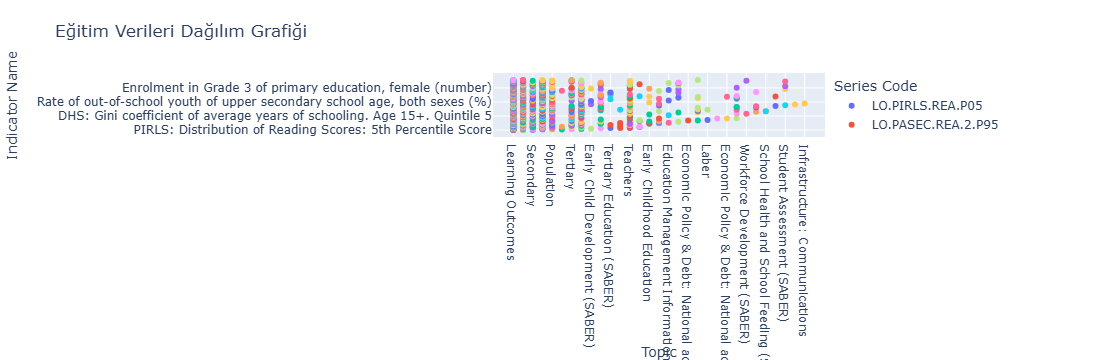

In [101]:
#Plotly kütüphanesini dizi dağılım grafiği (scatter plot) oluşturma(dataFramelerdeki değişkenler arasındaki ilişkileri)
fig1 = px.scatter(df1, x="Country Code", y="Indicator Code",color="Country Code", title="Country Code vs Indicator Code")
fig2 = px.scatter(df2, x="CountryCode", y="SeriesCode",color="DESCRIPTION", title="Country vs Series Code")
fig3= px.scatter(df3, x="CountryCode", y="Year",color="Year", title="Country Code vs Year")
fig4 = px.scatter(df4, x="Region", y="Income Group", color="Country Code", title="Ülke Verileri Dağılım Grafiği")
fig5 = px.scatter(df5,x="Topic",y="Indicator Name",color="Series Code",title="Eğitim Verileri Dağılım Grafiği")
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()

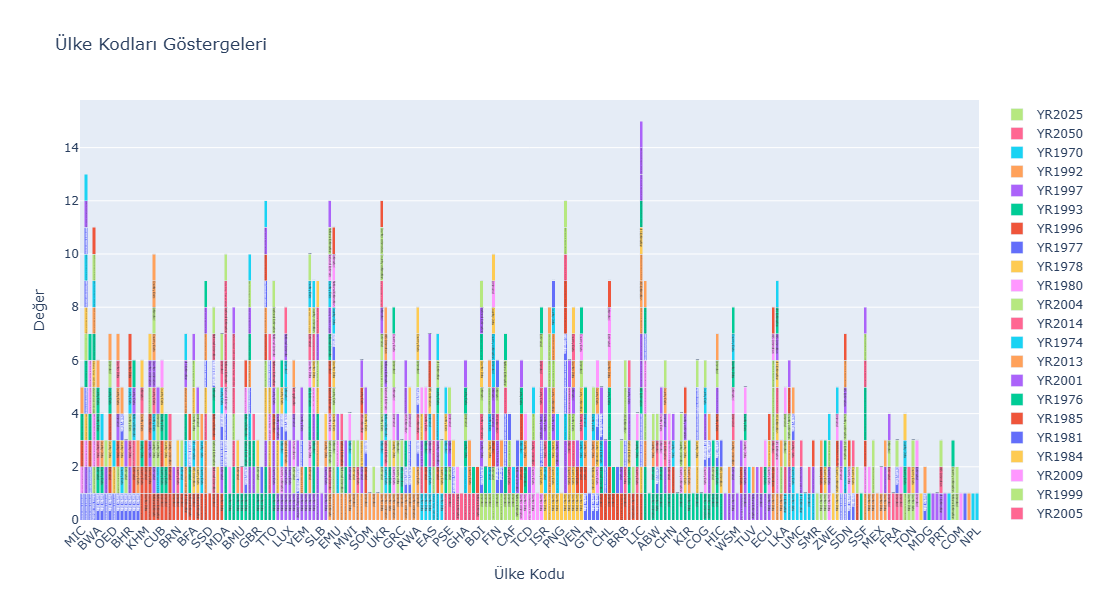

In [103]:
#yığılmış çubuk grafik (stacked bar chart) (farklı yıllardaki ülke kodlarının gösterge verilerini karşılaştırmak)
years = df3['Year'].unique()
fig = go.Figure()
for year in years:
    year_data = df3[df3['Year'] == year]
    fig.add_trace(go.Bar(
        x=year_data['CountryCode'],
        y=[1] * len(year_data),
        name=year,
        text=year_data['DESCRIPTION'],
        textposition='auto'
    ))
fig.update_layout(
    barmode='stack',
    title_text='Ülke Kodları Göstergeleri',
    xaxis_title='Ülke Kodu',
    yaxis_title='Değer',
    xaxis_tickangle=-45,
    width=1200, 
    height=600   
)
fig.show()

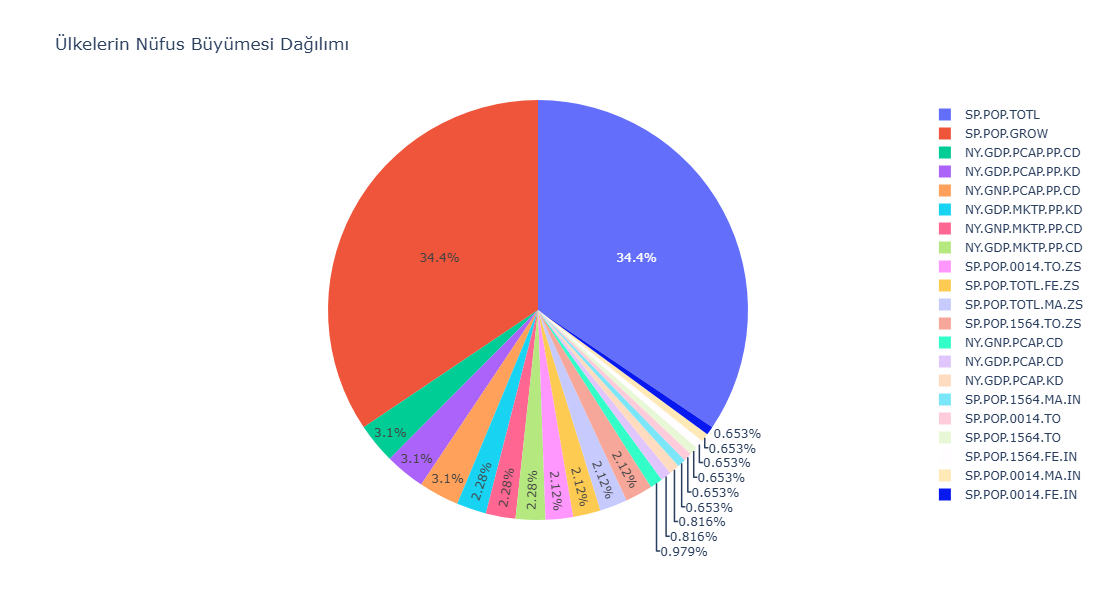

In [104]:
# pasta grafiği (pie chart)  "SeriesCode" sütunundaki değerlerin frekansını görselleştirme
series_counts = df2['SeriesCode'].value_counts()
fig2 = px.pie(series_counts, names=series_counts.index, values=series_counts.values,
             title='Ülkelerin Nüfus Büyümesi Dağılımı')
fig2.update_layout(width=600, height=600)
fig2.show()

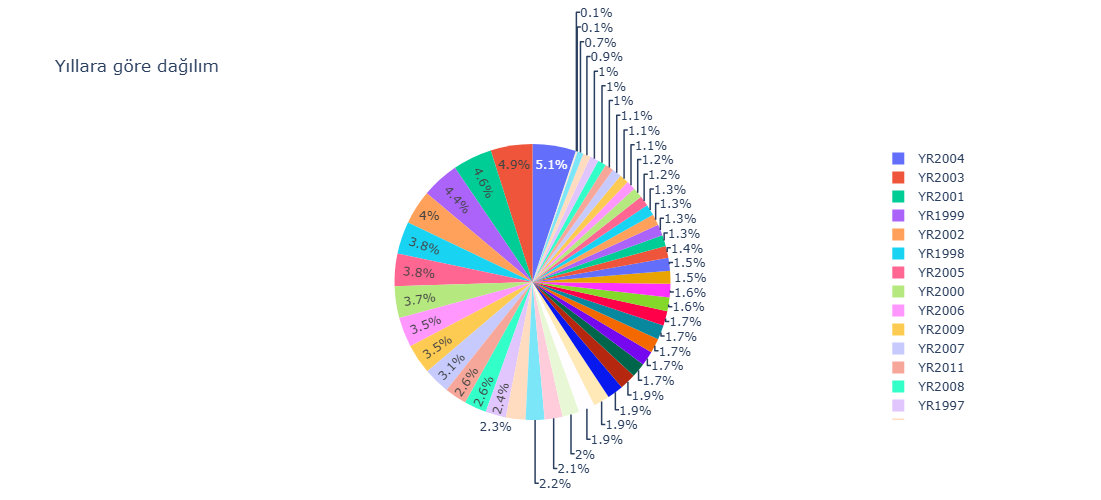

In [113]:
#Year sütunundaki yılların frekansını görselleştirme
description_counts = df3['Year'].value_counts()
fig3 = px.pie(description_counts, names=description_counts.index, values=description_counts.values,
             title='Yıllara göre dağılım')
fig3.update_layout(width=500, height=500)
fig3.show()

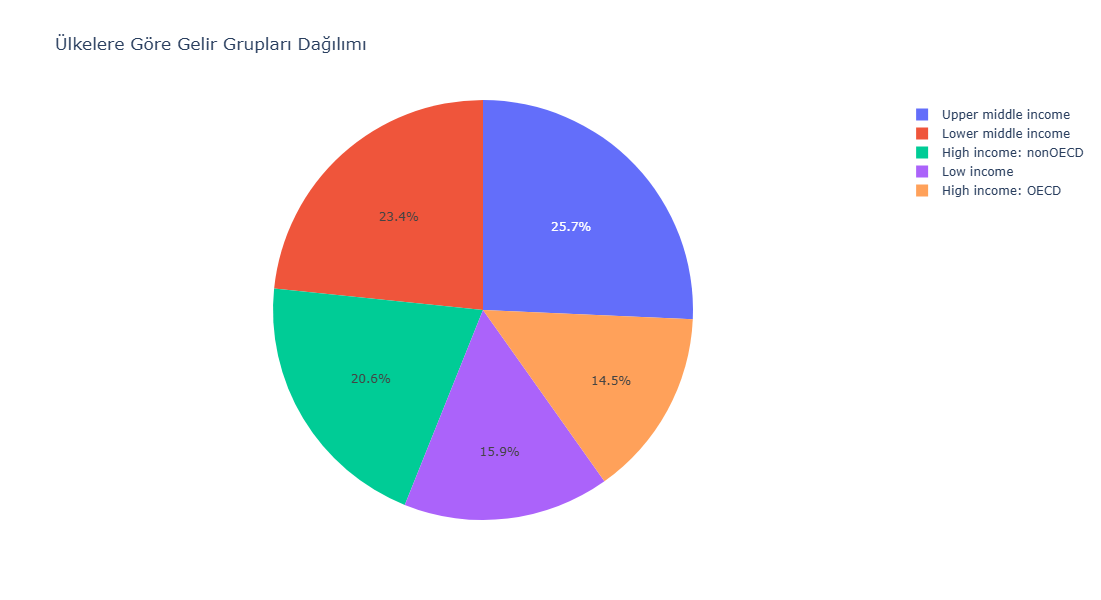

In [106]:
# Income Group sütunundaki gelir gruplarının frekansını görselleştirme
income_counts = df4['Income Group'].value_counts()
fig4 = px.pie(income_counts, names=income_counts.index, values=income_counts.values,
             title='Ülkelere Göre Gelir Grupları Dağılımı')
fig4.update_layout(width=600, height=600)
fig4.show()

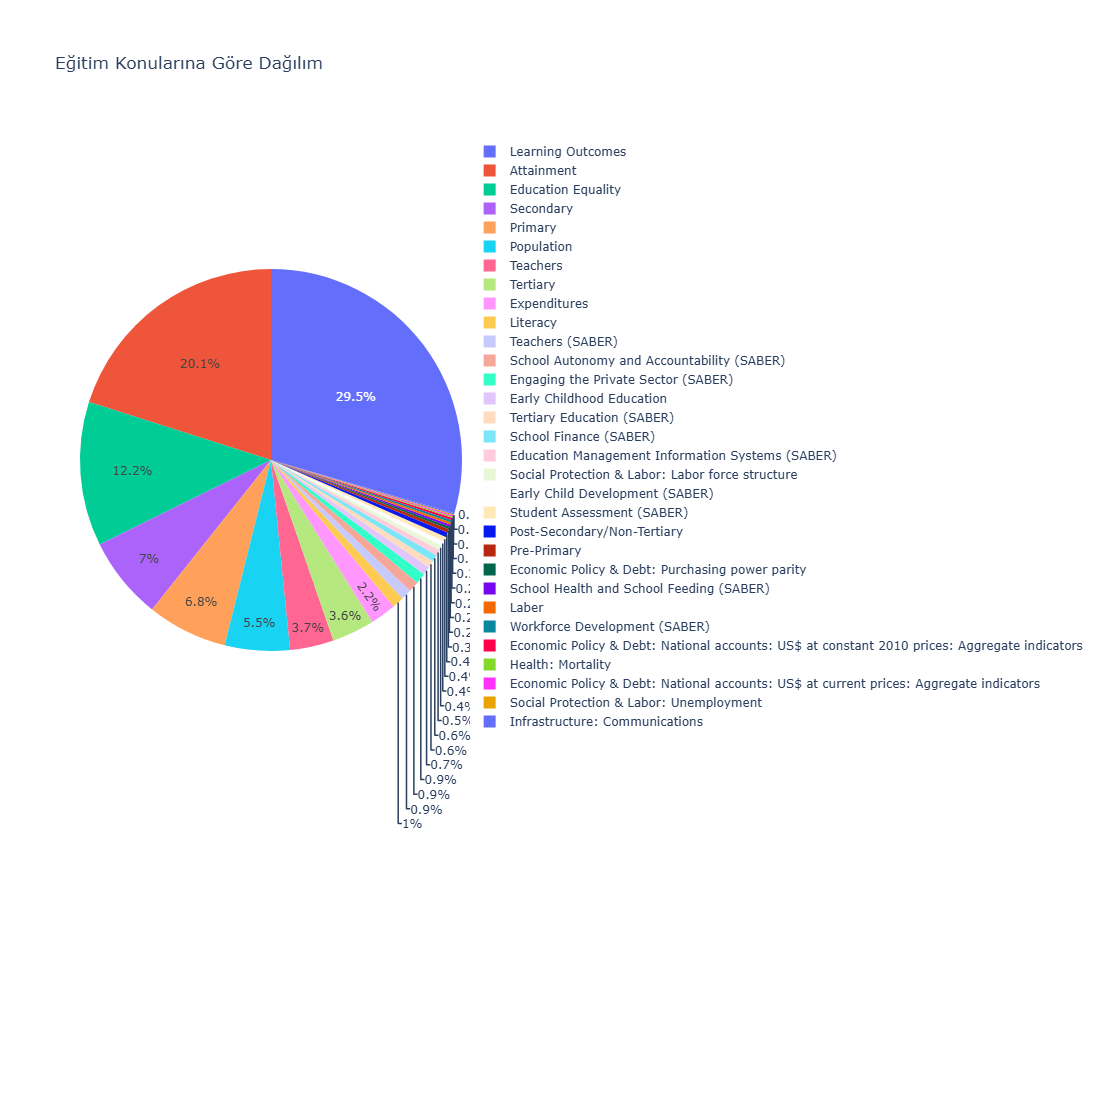

In [107]:
# Topic sütunundaki eğitim konularının frekansını görselleştirir
topic_counts = df5['Topic'].value_counts().reset_index()
topic_counts.columns = ['Topic', 'Count']
fig5= px.pie(topic_counts, values='Count', names='Topic', title='Eğitim Konularına Göre Dağılım')
fig5.update_layout(width=1000, height=1100)
fig5.show()

Kadın Kayıt Oranı Modeli:
MSE: 1.3545318957941277e-29
R^2: 1.0

Erkek Kayıt Oranı Modeli:
MSE: 26.457752752555063
R^2: 0.8120388676695429


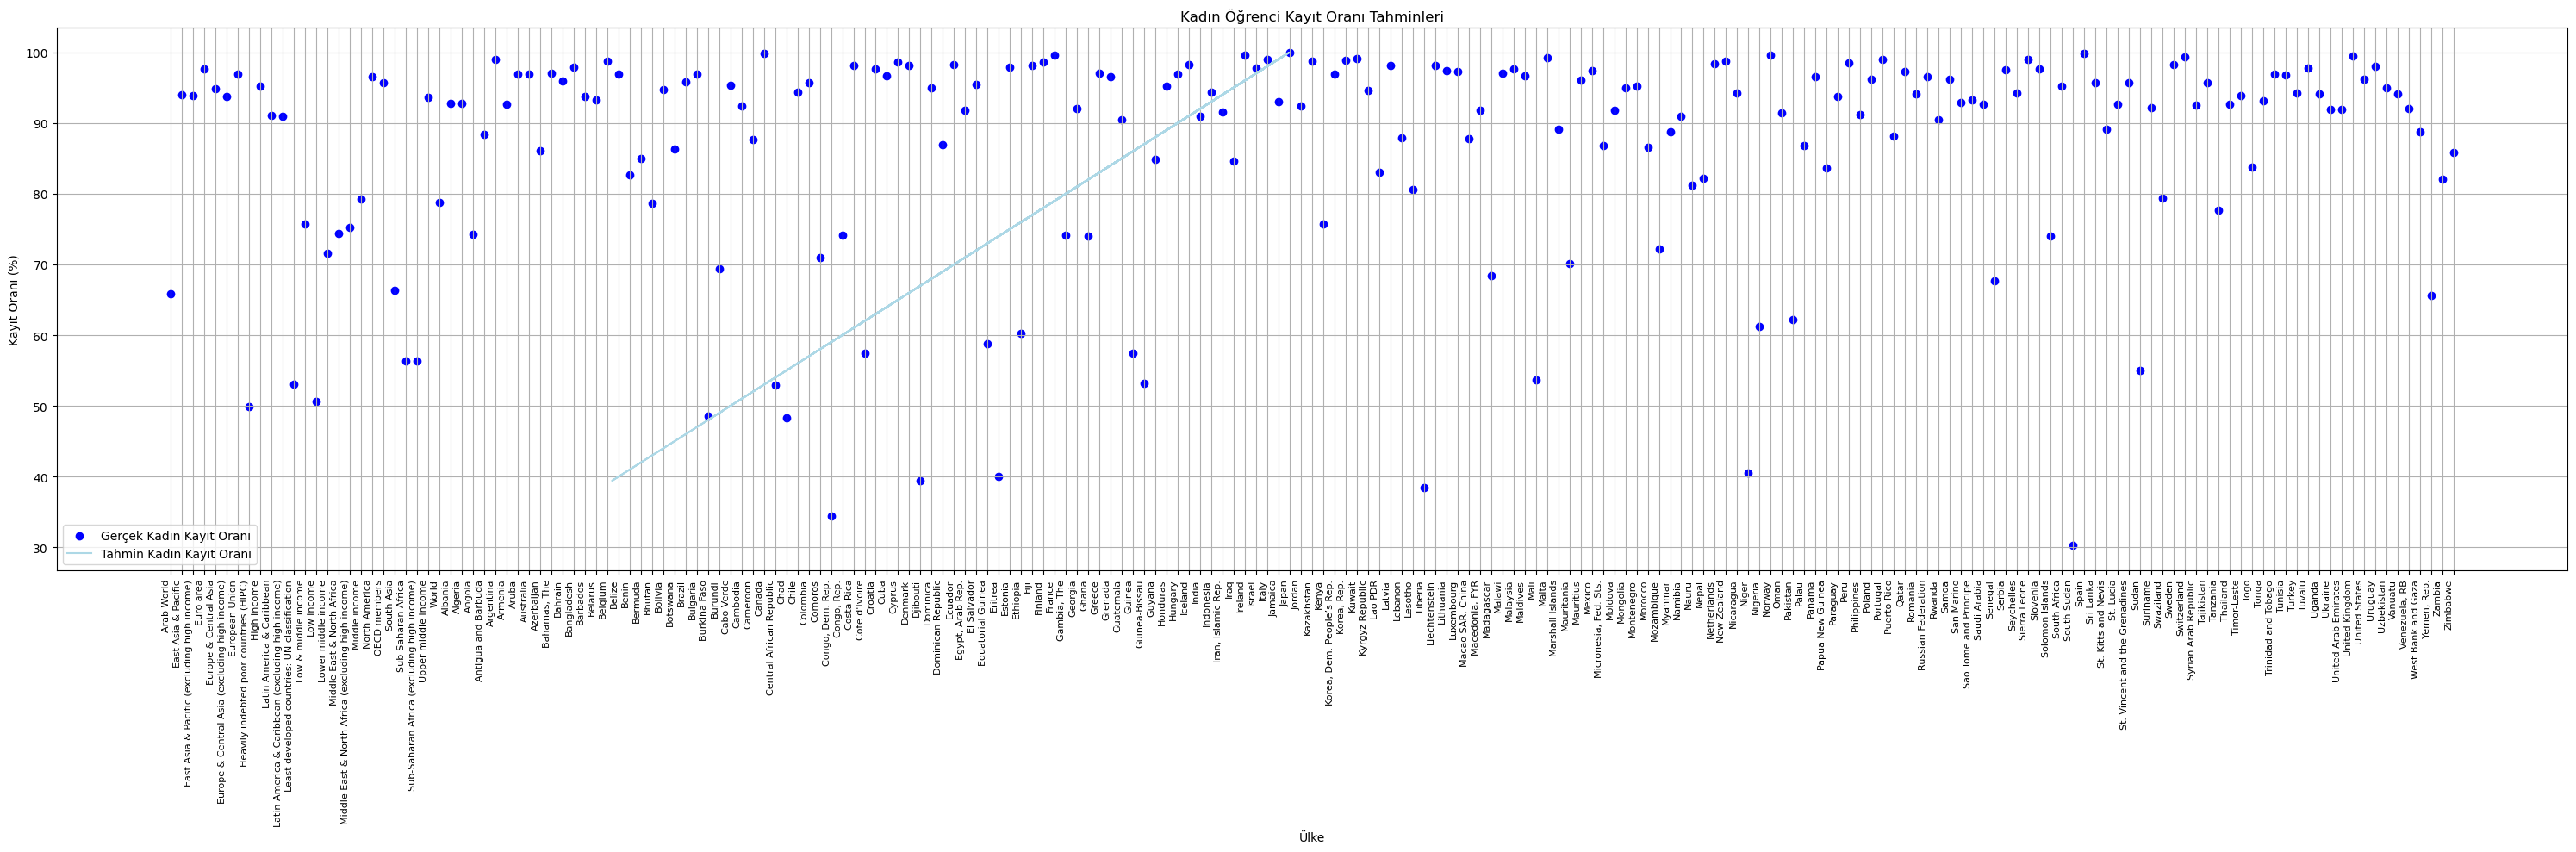

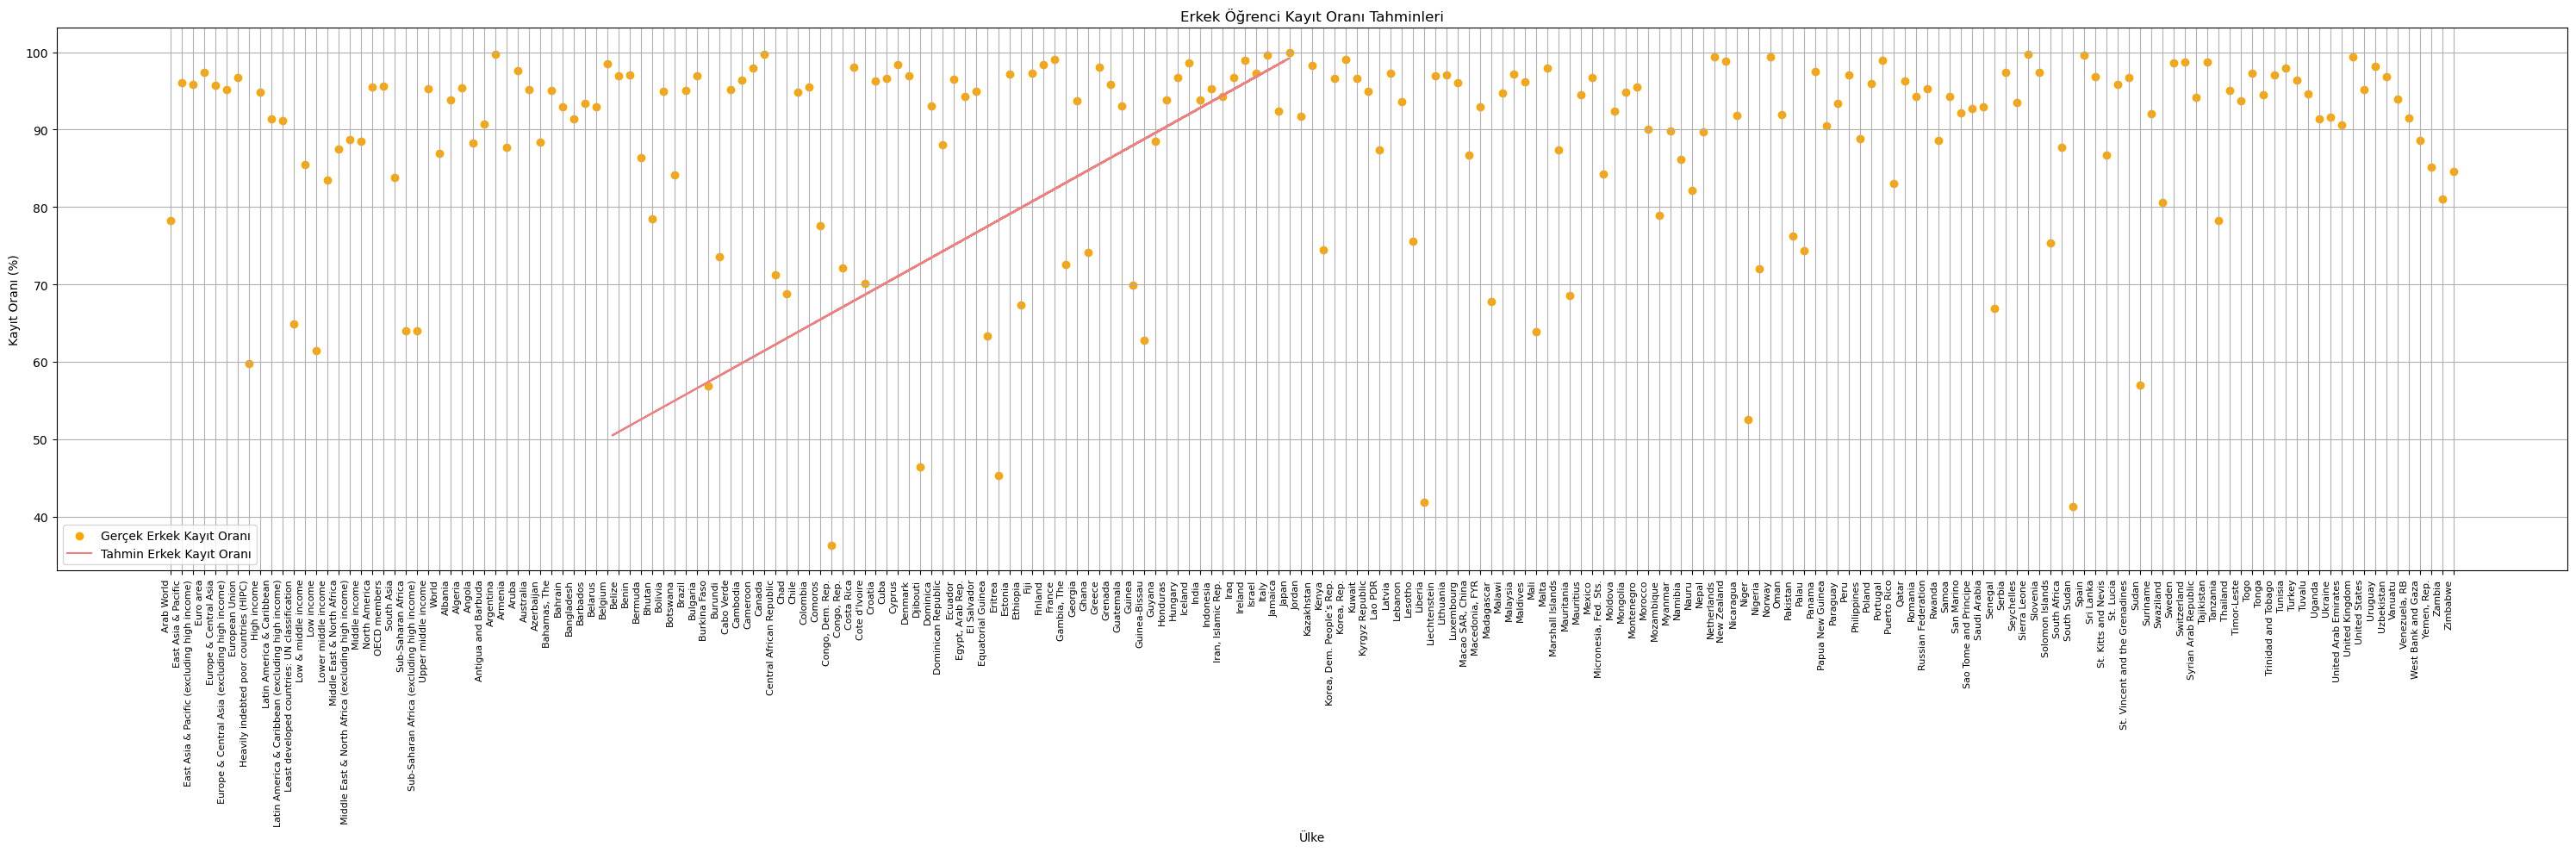

In [114]:
# kadın ve erkek öğrenci kayıt oranlarının analizi ve tahmini
# kadın ve erkek kayıt oranlarını filtreleme
female_enrollment = df[df['Indicator Name'] == 'Adjusted net enrolment rate, primary, female (%)']
male_enrollment = df[df['Indicator Name'] == 'Adjusted net enrolment rate, primary, male (%)']

# ülkeleri alma
countries = female_enrollment['Country Name'].values
female_rates = female_enrollment.iloc[:, 4:].mean(axis=1).values  # Yılların ortalaması
male_rates = male_enrollment.iloc[:, 4:].mean(axis=1).values  

# veri çerçevesi oluşturma
enrollment_data = pd.DataFrame({
    'Country': countries,
    'Female Enrollment': female_rates,
    'Male Enrollment': male_rates
})

# eksik verileri kaldırma (doldurma değil kaldırma yaptım çünkü sayısal değer yoktu)
enrollment_data.dropna(inplace=True)

#  hedef değişkenleri belirleme
X = enrollment_data[['Female Enrollment']]
y_female = enrollment_data['Female Enrollment']
y_male = enrollment_data['Male Enrollment']

# eğitim ve test setlerine ayırma
X_train, X_test, y_train_female, y_test_female = train_test_split(X, y_female, test_size=0.2, random_state=42)
X_train, X_test, y_train_male, y_test_male = train_test_split(X, y_male, test_size=0.2, random_state=42)

# model oluşturma ve eğitme
model_female = LinearRegression()
model_female.fit(X_train, y_train_female)

model_male = LinearRegression()
model_male.fit(X_train, y_train_male)

# tahmin yapma
y_pred_female = model_female.predict(X_test)
y_pred_male = model_male.predict(X_test)

# performans metrikleri
print("Kadın Kayıt Oranı Modeli:")
print("MSE:", mean_squared_error(y_test_female, y_pred_female))
print("R^2:", r2_score(y_test_female, y_pred_female))
print("\nErkek Kayıt Oranı Modeli:")
print("MSE:", mean_squared_error(y_test_male, y_pred_male))
print("R^2:", r2_score(y_test_male, y_pred_male))
#kadın kayıt oranlarını görselleştirme
plt.figure(figsize=(30, 10))
plt.scatter(enrollment_data['Country'], enrollment_data['Female Enrollment'], color='blue', label='Gerçek Kadın Kayıt Oranı')
plt.plot(X_test['Female Enrollment'], y_pred_female, color='lightblue', label='Tahmin Kadın Kayıt Oranı')
plt.title('Kadın Öğrenci Kayıt Oranı Tahminleri')
plt.xlabel('Ülke')
plt.ylabel('Kayıt Oranı (%)')
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.legend()
plt.grid()
plt.tight_layout()  
plt.show()

# Erkek kayıt oranlarını görselleştirme
plt.figure(figsize=(30, 10))
plt.scatter(enrollment_data['Country'], enrollment_data['Male Enrollment'], color='orange', label='Gerçek Erkek Kayıt Oranı')
plt.plot(X_test['Female Enrollment'], y_pred_male, color='lightcoral', label='Tahmin Erkek Kayıt Oranı')
plt.title('Erkek Öğrenci Kayıt Oranı Tahminleri')
plt.xlabel('Ülke')
plt.ylabel('Kayıt Oranı (%)')
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.legend()
plt.grid()
plt.tight_layout()  
plt.show()